---
authors: Naren Ramakrishnan
  - name: Naren Ramakrishnan
    affiliation: University of Washington
    email: narenpr@uw.edu
    github: https://github.com/NarenRamakrishnan
    linkedin: www.linkedin.com/in/naren-ramakrishnan
---

# Machine Learning Techniques for Flood Extent Detection

**TODO**: The goal of this project is to apply Machine Learning to SAR-based flood extent data to build a model to identify floodings.SAR data is a type of image data created by a Synthetic Aperture Radar system, which uses microwave radar to create images of the Earth's surface.
Using the NASA Flood Extent Detection dataset, I will explore how ML can enhance flood risk assessment and contribute to early warning systems that save lives and minimize damage.The research questions I aim to explore are listed below.

**Research questions**:

1. How can historical SAR-based flood extent data be used to identify recurring flood-prone regions?
   
    Historical SAR flood maps, combined with ML models, can identify regions that flood frequently by mapping predicted flood pixels to geographic coordinates, enabling flood frequency mapping for planning and warnings.

2. How accurately can Machine Learning models detect flood extents from Sentinel-1 SAR imagery compared to existing baseline methods?

    Under resource constraints, the UNet model achieved 82% overall accuracy. While not exceeding all existing methods, Sentinel-1 SAR data is promising for accurate flood detection, especially when combined with rainfall or other prediction methods.

   
3. What image-processing or feature-extraction techniques yield the most accurate flood extent detection from SAR data?

    The ratio feature yielded the highest overall accuracy (97%) but failed at detecting floods. VV alone gave the best balance between overall accuracy and flood detection, highlighting the importance of feature choice and evaluating flood-specific performance.

## Motivation

**TODO**: Floods are one of the most devasting natural disasters in the world today. Many have lost their lives due to the unpredictability of this disaster. Additionally, floods cause severe economical and environmental damage leaving entire cities devastated. Climate change continues to affect weather patterns, and with the melting of the ice caps, the frequency and severity of floods are projected to increase. This urges the required development of flood prediction models to mitigate the impact of
future floods.

• Research question 1

At the base of this project is the identification of the most recurring flood-prone regions. Identifying the most recurring flood-prone regions could create a positive global impact, allowing fortification and therefore the reduction of lives lost.

• Research question 2

While this research question is similar to my first research question, it takes a more technical approach. As I am interested in Machine Learning, this research question would allow me to identify and compare multiple existing machine learning models against the existing baseline methods. My main motivation behind this research question is to explore ML's potential in flood detection

• Research question 3

This research would allow me to take a more technical approach to this problem, allowing me to explore various image-processing and feature-extraction techniques while also maintaining focus on creating a positive global impact through flood detection.

Having used Machine Learning for Autism detection, I have witnessed first-hand the positive social impact that Machine Learning can have in the world. I believe this project can make a tangible difference in how we respond to these disasters. By identifying flood-prone regions and recurring patterns, we can strengthen early warning systems, help communities better prepare, and save lives. Addressing these research questions could be a steppingstone to help inform more effective disaster management policies, guide infrastructure development in flood prone areas, and help us better understand how geographic factors influence flooding. I care about this problem because it represents the intersection of technology and humanitarian impact. Like my project with autism, this project can have a positive global impact by directly supporting efforts to build safer and more resilient communities worldwide.

In [1]:
your_name = "Naren Pudupatty Ramakrishnan"
sources = [
    "https://howtodoinjava.com/python/beautifulsoup-example-cheat-sheet/",
    "https://realpython.com/pandas-python-explore-dataset/",
    "https://www.crummy.com/software/BeautifulSoup/bs4/doc/",
    "https://docs.python.org/3/library/urllib.parse.html",
    "https://courses.cs.washington.edu/courses/cse163/25au/numpy/",
    "https://docs.python.org/3/library/os.html",
    "https://ikcest-drr.data.ac.cn/tutorial/k8023",
    "https://courses.cs.washington.edu/courses/cse163/25au/data-visualization/",
    "https://www.geeksforgeeks.org/data-visualization/plotting-histogram-in-python-using-matplotlib/",
    "https://realpython.com/python-histograms/",
    "https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html",
    "https://debuggercafe.com/unet-from-scratch-using-pytorch/",
    "https://github.com/uygarkurt/UNet-PyTorch/blob/main/unet.py",
    "https://discuss.pytorch.org/t/dealing-with-imbalanced-datasets-in-pytorch/22596/3"
]

assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 6, "must include at least 6 sources, inclusive of lectures and sections"

## Data Setting

**TODO**: 

The primary dataset I will be using for this project is the NASA Flood Extent Detection dataset. It contains information derived from Synthetic Aperture Radar (SAR) images captured during various flood events in the U.S and Bangladesh. The dataset was created by NASA-IMPACT collaborating with University of Alabama in Huntsville and includes 50000 (according to UC Irvine ML Repository) SAR images. The data was collected from the European Space Agency’s Sentinel-1A and Sentinel-1B missions. Each image relates to a specific flood event and is labeled to indicate if it represents a flooded or non-flooded region. The dataset is openly available for access on UC Irvine’s Machine Learning Repository: https://archive.ics.uci.edu/dataset/770/nasa+flood+extent+detection

A datasheet is available for this dataset providing detailed documentation about its
creation, labeling methodology, and intended application. Considering the context
of this dataset, the following are some limitations which may complicate the
analysis:

1. The dataset does not contain data worldwide, covering only events in the U.S. and Bangladesh. This may reduce the model’s generalizability to other regions with different terrain or flooding patterns.

2. There may be some noise in the data. This would affect the flood detection accuracy and would thus require preprocessing the data to filter it out before model training to ensure maximum accuracy.

3. There may be errors in labelling. While the dataset was reviewed by Flood domain experts and provided to Earth science students for labeling, there may be errors in labeling due to limitations in human interpretation. This could introduce noise into model training.
 
Though these limitations exist, these challenges can be mitigated through preprocessing and augmenting the data by also including other relevant datasets or through synthetic data augmentation.

In [2]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import doctest

I wrote this code to extract all the files from the dataset because there was no way to download
it all once from the dataset without having to individually download every file. I wont be 
downloading the dataset in jupyter lab because it takes up a lot of space 
(4.55 GB for just one dataset), but I have added a few folders in the 'data' folder showing 
example data from the dataset. This also skipped folders with the same name as they were 
an error on my part while copying the folder names.

In [3]:
def get_file_links(url):
    """
    This function takes in a url as input and returns all of the file links with a .tif, .png, 
    .msk, or .zip ending. As all of the folders from the dataset follow the same format, I won't
    be including edge cases in my doctests but will test on one folder. Also sorry about making
    the doctest really long but the output returned an error as it did not match the doctest if
    I set the expected output to be in multiple lines as opposed to one really long line.

    >>> get_file_links("https://staging.source.coop/nasa/floods/bangladesh_20170606t115613")
    ['https://data.source.coop/nasa/floods/bangladesh_20170606t115613/bangladesh_20170606t115613_label.png', 'https://data.source.coop/nasa/floods/bangladesh_20170606t115613/bangladesh_20170606t115613_label.tif', 'https://data.source.coop/nasa/floods/bangladesh_20170606t115613/bangladesh_img_news1a_iw_rt30_20170606t115613_g_gpf_vh.tif', 'https://data.source.coop/nasa/floods/bangladesh_20170606t115613/bangladesh_img_news1a_iw_rt30_20170606t115613_g_gpf_vh.tif.msk', 'https://data.source.coop/nasa/floods/bangladesh_20170606t115613/bangladesh_img_news1a_iw_rt30_20170606t115613_g_gpf_vv.tif', 'https://data.source.coop/nasa/floods/bangladesh_20170606t115613/bangladesh_img_news1a_iw_rt30_20170606t115613_g_gpf_vv.tif.msk']

    """
    r = requests.get(url)
    r.raise_for_status()
    soup = BeautifulSoup(r.text, "html.parser")
    file_links = []
    for a in soup.find_all("a", href = True):
        href = urljoin(url, a["href"])
        if any(href.endswith(ext) for ext in [".tif", ".png", ".msk", ".zip"]):
            href = href.replace("staging.source.coop", "data.source.coop")
            if href not in file_links:
                file_links.append(href)
    return file_links
    
doctest.run_docstring_examples(get_file_links, globals())

In [4]:
def download_file(url, folder):
    """
    This function takes in a url and path to a folder as input. It then downloads the file into
    the specified folder path, checking and making the folder if it does not exist.
    I tested this function by passing a few files individually into the function along
    with a specific folder path and visually checked if the file was downloaded appropiately.
    """
    
    file_name = os.path.basename(urlparse(url).path)
    path = os.path.join(folder, file_name)
    os.makedirs(os.path.dirname(path), exist_ok = True)  
    if os.path.exists(path):
        return
    try:
        with requests.get(url, stream = True) as r:
            r.raise_for_status()
            with open(path, "wb") as f:
                for chunk in r.iter_content(8192):
                    f.write(chunk)
        return path
    except requests.exceptions.RequestException:
        print(f"There was an error downloading {url}")
        


In [5]:
# Testing download_file on a singular file
download_file(
"https://data.source.coop/nasa/floods/bangladesh_20170606t115613/bangladesh_20170606t115613_label.png",
    "data")
print("done")

done


In [6]:
def download_all_files(folder_url, download_dir):
    """
    This function combines the two above and works in harmony with each other. I tested this
    by running it on a smaller subsection of the dataset before running it on the entire
    dataset.
    """
    file_links = get_file_links(folder_url)
    for link in file_links:
        download_file(link, download_dir)

In [7]:
#Testing download_all_files on a singular folder first
download_all_files("https://staging.source.coop/nasa/floods/bangladesh_20170314t115609",
                   "data/bangladesh_20170314t115609")

In [8]:
#These are all the folder names in the dataset
flood_names=['bangladesh_20170314t115609',
'bangladesh_20170606t115613',
'bangladesh_20170712t115615',
'florence_20180510t231343',
'florence_20180522t231344',
'florence_20180603t231344',
'florence_20180615t231345',
'florence_20180709t231346',
'florence_20180721t231347',
'florence_20180802t231348',
'florence_20180907t231350',
'florence_20180919t231350',
'florence_20181001t231350',
'nebraska_20170108t002112',
'nebraska_20170213t002121',
'nebraska_20170309t002110',
'nebraska_20170402t002111',
'nebraska_20170508t002113',
'nebraska_20170520t002113',
'nebraska_20170601t002114',
'nebraska_20170402t002111',
'nebraska_20170508t002113',
'nebraska_20170520t002113',
'nebraska_20170601t002114',
'nebraska_20170929t002120',
'nebraska_20171116t002120',
'nebraska_20171210t002119',
'nebraska_20171222t002118',
'northal_20190302t234651',
'northal_20190407t234651',
'northal_20190419t234652',
'northal_20190513t234653',
'northal_20190525t234653',
'northal_20190606t234654',
'northal_20190618t234654',
'northal_20190630t234655',
'northal_20190724t234657',
'northal_20190805t234658',
'northal_20190829t234659',
'northal_20190910t234659',
'northal_20191004t234700',
'northal_20191121t234700',
'northal_20191227t234659',
'redrivernorth_20190104t002247',
'redrivernorth_20190116t002247',
'redrivernorth_20190128t002246',
'redrivernorth_20190209t002246',
'redrivernorth_20190221t002246',
'redrivernorth_20190317t002246',
'redrivernorth_20190410t002246',
'redrivernorth_20190422t002247',
'redrivernorth_20190504t002247',
'redrivernorth_20190516t002248',
'redrivernorth_20190528t002248',
'redrivernorth_20190609t002249',
'redrivernorth_20190621t002250']

In [ ]:
"""
This is the final code which uses all functions I defined above to download all the files from
the dataset
"""
# I did not run this code on jupyterlab because the file was too large. 
#I ran it locally on VS code instead. To run it on VS code, change the base_dir to match the user's
# desired output path.
base_url = "https://staging.source.coop/nasa/floods"
base_dir = "data" # I changed the base_dir so it would work with this jupyter
# notebook as well
for flood_name in flood_names:
    folder_path = os.path.join(base_dir, flood_name)
    os.makedirs(folder_path, exist_ok = True)
    folder_url = f"{base_url}/{flood_name}"
    download_all_files(folder_url, folder_path)

## Method

**TODO**: 

**• Step 1: Data Loading and Conversion**:
This is a data-manipulation function that involves loading the SAR images from the dataset after scraping the data from the dataset. I can test this function on a few images from the dataset to ensure they download properly.

**• Step 2: Preprocessing**:
This is a data-manipulation function that involves resizing images to a consistent shape and performing data augmentation. I can test this function on a few images from the dataset and manually check the output to see if it fits the appropriate specifications. This ensures the model receives clean and consistent inputs connecting to the Messy Data challenge goal.

**• Step 3: Train/Test Split**:
This is a data-manipulation function that involves splitting the dataset into train and test sets. I can test this by ensuring there is an appropriate split of images with no duplicates across splits.

**• Step 4: Modeling Training and Evaluation**:
This is a data-manipulation function that involves training multiple Machine Learning models with systematic hyperparameter tuning and then evaluating them using accuracy, precision, recall, and F1-score on the validations set. I can test this by first running the function on a smaller sized dataset to ensure training completes without errors and the metrics are reflected. This also directly address research question 3 and 4 by allowing the comparison of model performance for flood detection.

**• Step 5: Visualization**:
This is a plotting function that involves better understanding the results by plotting the accuracy scores of the model. This can help better visualize the results as opposed to looking at multiple numbers across features.

**• Step 6: Conclusions**:
This is the final step and involves interpreting the results to address the research question. The analysis will involve finding the regions that are most frequently affected by flooding, how effectively SAR data can predict flood-prone areas, and which Machine Learning models perform the best for this task.

## EDA Results

**TODO**: My EDA was focussed towards loading my data and helping me grab a better understanding of it. It involved data scraping, creating visualizations, and exploring the different files and their types in the dataset.


The EDA of the SAR images and its labels showed that the dataset includes a large number of pixels(billions), with most of the pixels representing land, pixels representing water being much fewer, and a moderate number of pixels had no data. The Histogram of the VV and VH backscatter values showed that water pixels generally have a lower backscatter intensity than land pixels, highlighting a trend in the dataset which could prove to be a meaningful feature for the model. I was also a bit concerned about whether there would be enough data to train/test/validate the model, however the EDA showed me that there were billions of pixels and that I could split a singular label.tif file into multiple ones. This would allow me to pass a larger number of smaller files into the model which could reduce training time and possibly prevent the model from overfitting (as a larger number of files would prevent it from overfitting compared to just 52 files).

**How large is your dataset?**

In [9]:
base_dir = "data"
total = 0
flood_names = os.listdir(base_dir)
for flood in flood_names:
    folder_path = os.path.join(base_dir,flood)
    if not os.path.isdir(folder_path):
        continue
    files = os.listdir(folder_path)
    total += len(files)
print(f"total number of files:{total}")
print(f"total number of folders:{len(flood_names)}")


total number of files:7
total number of folders:3


Since I haven't uploaded all my data on this notebook, I ran this code locally, on VS code, and attached a picture of the result below.
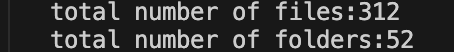

But not all of the files from every folder are needed.

**What is the data and what does it show?**

In [10]:
base_dir = "data/bangladesh_20170314t115609"
os.listdir(base_dir)

['bangladesh_img_news1a_iw_rt30_20170314t115609_g_gpf_vv.tif',
 'bangladesh_img_news1a_iw_rt30_20170314t115609_g_gpf_vv.tif.msk',
 'bangladesh_img_news1a_iw_rt30_20170314t115609_g_gpf_vh.tif.msk',
 'bangladesh_20170314t115609_label.tif',
 'bangladesh_img_news1a_iw_rt30_20170314t115609_g_gpf_vh.tif',
 'bangladesh_20170314t115609_label.png']

These are the different types of files within the folder 'bangladesh_20170314t115609'. The names of the folder are based on the location and the timestamp of the SAR-image. The 'bangladesh_img_news1a_iw_rt30_20170314t115609_g_gpf_vv.tif' file 'vv' to generalize and the 'bangladesh_img_news1a_iw_rt30_20170314t115609_g_gpf_vh.tif' 'vh' to generalize (these type of files (vv and vh) exist in every folder in the dataset) are the inputs to the model. 

SAR sends and recieves microwave signals to view Earth. vv refers vertical-vertical polarization and vh refers to vertical-horizontal polarization. Polarization refers to the direction of the radar wave (uses microwave signals). v refers to the electric field of wave being vertical while h refers to the electric field of wave being horizontal. vv refers to when radar sends a vertical wave and recieves a vertical wave while vh refers to when radar sends a vertical wave but recieves a horizontal wave. Using both vv and vh helps build a better image of the land, vv highlights water, while vh highlights vegetation or rough surfaces. However, I am not fully sure if this is accurate, this was based on my research.

The target labels or the output of the model are stored in the bangladesh_20170314t115609_label.tif or to generalize, label.tif files. These files include an 8-bit integer for every value, however each pixel can only take on 3 different values:
255 which refers to when theres water(flooded)
0 when there is no water(land)
and 15 when there is no data due to errors in data collection. The 'bangladesh_20170314t115609_label.png' or 'label.png' files to generalize help to visalize the same data that is represented in the label.tif files.

The .msk files are masked files which include binary data for every pixel. 1 refers to a valid pixel while 0 refers to a pixel with no data. These files are used to identify which pixels have no data but can be ignored or used as an auxiliary as the label.tif files show the same.

In essence only the vv and vh files are used as input, and the label.tif files are used as the target values. If the model runs into errors, I may use the masked files to tell it which pixels to ignore or use the png files to possibly improve accuracy.

In [12]:
import imageio.v3 as iio
import matplotlib.pyplot as plt

/opt/conda/lib/python3.11/site-packages/PIL/Image.py:3432: DecompressionBombWarning: Image size (139013368 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


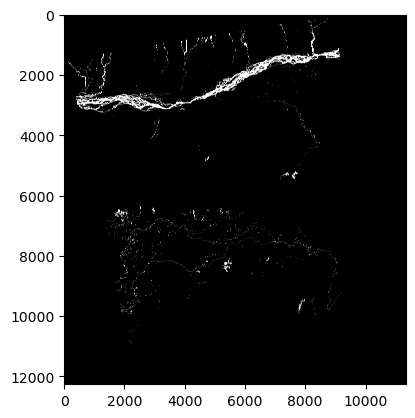

In [13]:
"""
This shows an example of the .png files for visualization. 
"""

plt.imshow(iio.imread("data/bangladesh_20170314t115609/bangladesh_20170314t115609_label.png"),
           cmap = "gray")

**Does your dataset have any missing data?**

Yes the data has missing values as mentioned, represented by the pixels in the label.tif files with a value of 15.

In [ ]:
!conda install -c conda-forge gdal -y
#This was needed to download gdal as pip install did not work

In [14]:
from osgeo import gdal
import numpy as np

In [15]:
def read_band(path):
    """
    This function takes the path to .tif file and returns its first 
    raster band as a numpy array.
    """
    ds = gdal.Open(path)
    band = ds.GetRasterBand(1)
    return band.ReadAsArray() 

In [16]:
root_dir = "data"
total_pixels = 0
num_no_data = 0

for dirpath, dirnames, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith("_label.tif"):
            filepath = os.path.join(dirpath, filename)
            label = read_band(filepath)
            num_no_data += np.sum(label == 15)
            total_pixels += label.size

print(f"The total percent of pixels in all the label.tif files with no data is {num_no_data / total_pixels * 100}")


/opt/conda/lib/python3.11/site-packages/osgeo/gdal.py:606: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


The total percent of pixels in all the label.tif files with no data is 31.200764087666734


I ran this code locally as all my data is stored and got the following output:
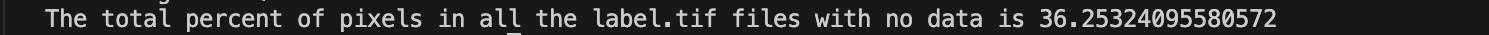
Luckily as I am working with SAR-based data, I can simply filter out the pixels with a value of 15 during model training and prevent the model from looking at this pixels while allowing it to also look at the entire file.

**What are the variables of interest for your research questions?**

The variables of interest for my research questions are, the pixels with values 0 and 255 in the label.tif files and the corresponding pixels in the vv and vh files. As I have expanded on what these variables are in the **What is the data and what does it show?** section I won't be doing it here.

These variables help focus on research question 1 and 3 as it would allow me to identify recurring flood-prone regions from SAR-based data and would also allow me to compare the accuracy of the model I run against existing methods.

**Give a summary of each variable of interest.**

I am not too sure how to give a summary of the vv and vh files so I will be giving a summary of the pixels (15-No data, 255-Water, 0-land) in the label.tif files.

In [17]:
def count_pixels_across_all_folders(base_folder, label_keyword="label"):
    """
    This function takes in a folder as input and returns the number of total pixels, pixels 
    with no data, pixels representing floods, and pixels representing land.
    """

    total_pixels = 0
    num_no_data = 0
    num_flood = 0
    num_land = 0

    for dirpath, _, filenames in os.walk(base_folder):
        for f in filenames:
            if label_keyword in f.lower() and f.lower().endswith(".tif"):
                path = os.path.join(dirpath, f)
                arr = read_band(path)

                num_no_data += np.sum(arr == 15)
                num_flood += np.sum(arr == 255)
                num_land += np.sum(arr == 0)
                total_pixels += arr.size

    return {
        "total": total_pixels,
        "no_data": num_no_data,
        "flood": num_flood,
        "land": num_land
    }

In [18]:
print(count_pixels_across_all_folders("data"))

{'total': 139013368, 'no_data': 43373233, 'flood': 2326553, 'land': 93313582}


Running this code locally I got


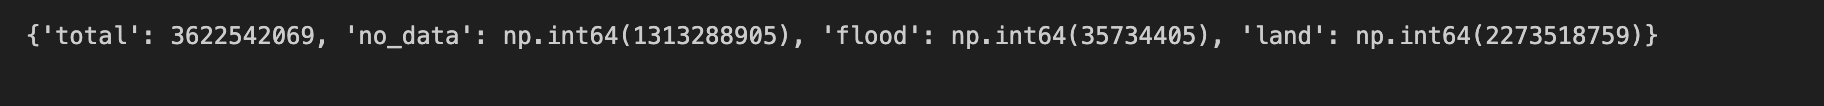

But these just look like big numbers so to get a better idea of the amount of data of each category, I will write it as a percentage of the total data.


In [19]:
total_pixels = 3622542069
no_data = 1313288905
data_water = 35734405
data_land = 2273518759
print(f"Percentage of pixels with no data: {no_data / total_pixels * 100}%")
print(f"Percentage of pixels with water data: {data_water / total_pixels * 100}%")
print(f"Percentage of pixels with land data: {data_land / total_pixels * 100}%")

Percentage of pixels with no data: 36.25324095580572%
Percentage of pixels with water data: 0.9864455489916355%
Percentage of pixels with land data: 62.760313495202645%


**Create at least 2 visualizations per dataset for the variables of interest**

In [20]:
import seaborn as sns
import pandas as pd
sns.set_theme()

**Alt text**: A bar chart showing the different representations a pixel can take in the dataset and how many fit that specific representation. The pixels can represent either land, water, or no data at all. This gives a brief idea of the data distribution in the dataset.

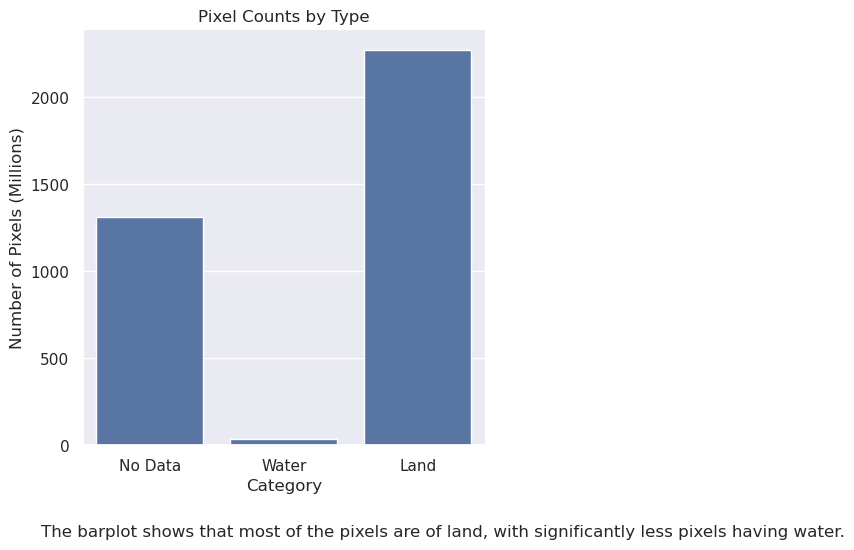

In [21]:
data = pd.DataFrame({
    'Category': ['No Data', 'Water', 'Land'],
    'Pixel Count(Millions)': [1313288905 / 1e6, 35734405 / 1e6, 2273518759 / 1e6]
})
graph = sns.catplot(
    data=data,
    x = 'Category',
    y = 'Pixel Count(Millions)',
    kind = 'bar'
)
graph.set(title = 'Pixel Counts by Type', xlabel = 'Category', ylabel = "Number of Pixels (Millions)")
plt.figtext(0.1,-0.05, "The barplot shows that most of the pixels are of land, with significantly less pixels having water.")
plt.show()


The barplot shows that there are millions of pixels which can be used for training, validation, and testing the model. This is important to note as there were only 104 (52 VV and 52 VH) files in the dataset yet there are millions of pixels. This suggests that there is enough data to train and test the model with and makes me consider another approach to the training/validation/testing of the model: passing parts of the image to the model as input as opposed to passing in the entire VV or VH file at once.

Additionally, it shows that there is an imbalance in the amount of data in the dataset as there are significantly more pixels representing land as opposed to water.

**Alt text**: A histogram showing VV and VH Backscatter Distribution. Water pixels are represented by the color blue(lower intensity) while land pixels are represented by the color green(higher intensity). This helps distinguish flooded regions.

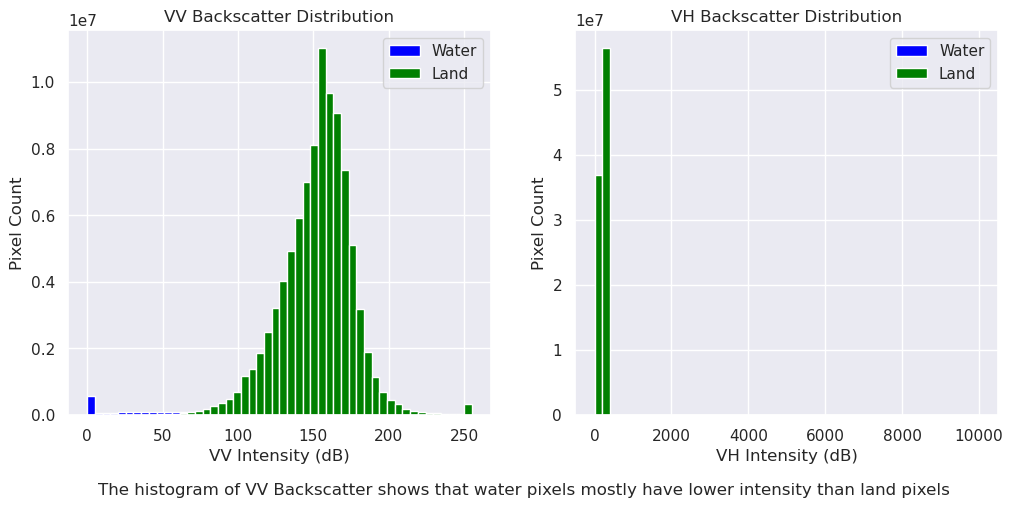

In [22]:
folder = "data/bangladesh_20170314t115609" 
vv_path = f"{folder}/bangladesh_img_news1a_iw_rt30_20170314t115609_g_gpf_vv.tif"
vh_path = f"{folder}/bangladesh_img_news1a_iw_rt30_20170314t115609_g_gpf_vh.tif"
label_path = f"{folder}/bangladesh_20170314t115609_label.tif"


vv = read_band(vv_path)
vh = read_band(vh_path)
label = read_band(label_path)

mask = label != 15
vv = vv[mask]
vh = vh[mask]
label = label[mask]

label_bin = (label == 255).astype(int)

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
ax1.hist(vv[label_bin == 1], bins = 50, label = "Water", color = 'blue')
ax1.hist(vv[label_bin == 0], bins = 50, label = "Land", color = 'green')
ax1.set_title("VV Backscatter Distribution")
ax1.set_xlabel("VV Intensity (dB)")
ax1.set_ylabel("Pixel Count")
ax1.legend()

ax2.hist(vh[label_bin == 1], bins = 50, label = "Water", color = 'blue')
ax2.hist(vh[label_bin == 0], bins = 50, label = "Land", color = 'green')
ax2.set_title("VH Backscatter Distribution")
ax2.set_xlabel("VH Intensity (dB)")
ax2.set_ylabel("Pixel Count")
ax2.legend()

plt.figtext(0.15,-0.05, "The histogram of VV Backscatter shows that water pixels mostly have lower intensity than land pixels")
plt.show()


The VV and VH backscatter represent the radar signal returned from each pixel as mentioned earlier. Water and land are differentiated by the flood label. The histogram shows that water pixels generally have a lower VV intensity than land pixels. This is a useful feature for flood detection and one that I am hoping the model will pick up on. This helps show that these VV and VH files have hidden trends which may not be visible at first glance to the human eye, but which a model can pickup using ML.

In [ ]:
!pip install rasterio

In [23]:
import rasterio

base_dir = "data"

folder_sizes = {}  

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    tif_files = [
        f for f in os.listdir(folder_path)
        if f.endswith(".tif")
    ]

    if len(tif_files) == 0:
        print(f"No TIFFs found in {folder}")
        continue


    first_tif = os.path.join(folder_path, tif_files[0])

    with rasterio.open(first_tif) as src:
        size = (src.width, src.height)
        folder_sizes[folder] = size

unique_sizes = set(folder_sizes.values())

print("Unique sizes")
for s in unique_sizes:
    print(s)



No TIFFs found in .ipynb_checkpoints
Unique sizes
(11336, 12263)


Running this code locally I got:

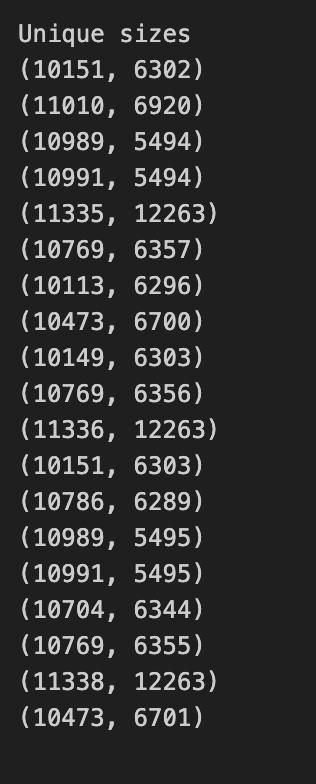

The code cell above shows that the .tif files in each folder are not only of different sizes, but are huge in size. As a result, I would not need to augment my data. Instead I can simply split each .tif file into multiple smaller .tif files. This would reduce training time and ensure the inputs fed into the model are kept constant. I chose to use a patch size of 512 which means that I will be splitting the larger .tif file into patches of size 512 * 512 pixels. I chose this number as it is very commonly used in ML but it would allow me to split a single .tif file into over 200 different patches.

In [24]:
import math
from rasterio.windows import Window

base_dir = "data"
output_dir = "data_split"
os.makedirs(output_dir, exist_ok=True)

patch_size = 512
TEST_FOLDER = "bangladesh_20170314t115609"

I will initially test the function on a singular patch to see if it works as expected. This would reduce debugging time and running time. Once it works on a singular patch, I will run it on all the files. I also noticed here that a few patches will be smaller than 512 * 512 pixels as my goal with this was to try and capture all the data. Later before feeding all the data into the ML model, I will add padding to all the patches which are not 512 * 512 pixels.

In [25]:
def find_file_for_keyword(files, keyword):
    """
    This function takes in an array of files as input and a keyword
    and returns the file in the array which matches the keyword.

    >>> find_file_for_keyword(["Flood_Map.tif", "VH_band.TIF", "notes.txt"],"flood")
    'Flood_Map.tif'
    """
    keyword = keyword.lower()
    for f in files:
        if keyword in f.lower():
            return f
    return None

doctest.run_docstring_examples(find_file_for_keyword, globals())

In [26]:
def save_patch(path, original_src, patch_data, transform):
    """
    This function takes in a path to save the patch,
    the original .tif file, the patch of the .tif file, and the 
    transformation being carried out on the .tif file and saves it in the specified location.
    """
    meta = original_src.meta.copy()
    meta.update({
        "height": patch_data.shape[1],
        "width": patch_data.shape[2],
        "transform": transform
    })
    with rasterio.open(path, "w", **meta) as dst:
        dst.write(patch_data)

In [27]:
#Testing for save_patch
save_patch("data/vv_patch.tif",rasterio.open("data/bangladesh_20170314t115609/bangladesh_img_news1a_iw_rt30_20170314t115609_g_gpf_vv.tif"),rasterio.open("data/bangladesh_20170314t115609/bangladesh_img_news1a_iw_rt30_20170314t115609_g_gpf_vv.tif").read(window= Window(0, 0, patch_size, patch_size)),rasterio.open("data/bangladesh_20170314t115609/bangladesh_img_news1a_iw_rt30_20170314t115609_g_gpf_vv.tif").window_transform(Window(0, 0, 512, 512)))

In [28]:
with rasterio.open("data/vv_patch.tif") as src_vv:
    print(src_vv.width, src_vv.height)

512 512


This shows that the code worked perfect for saving a singular patch!

I then create a base code to test creating patches out. This code now creates a singular patch from a singular folder, ensuring they are aligned (correlated) with each other.

I do this because it was honestly easier for me to understand by developing this code piece by piece.

In [29]:
folder_path = os.path.join(base_dir, TEST_FOLDER)
if not os.path.isdir(folder_path):
    raise RuntimeError(f"Folder {TEST_FOLDER} not found inside base_dir!")

all_tifs = [f for f in os.listdir(folder_path) if f.lower().endswith(".tif")]

vv_file = find_file_for_keyword(all_tifs, "vv")
vh_file = find_file_for_keyword(all_tifs, "vh")
label_file = find_file_for_keyword(all_tifs, "label")

vv_path = os.path.join(folder_path, vv_file)
vh_path = os.path.join(folder_path, vh_file)
label_path = os.path.join(folder_path, label_file)

with rasterio.open(vv_path) as src_vv, \
     rasterio.open(vh_path) as src_vh, \
     rasterio.open(label_path) as src_label:

    W, H = src_vv.width, src_vv.height

    assert (src_vv.width == src_vh.width == src_label.width)
    assert (src_vv.height == src_vh.height == src_label.height)

    nx = math.ceil(W / patch_size)
    ny = math.ceil(H / patch_size)
    
    window = Window(0, 0, patch_size, patch_size)

    vv_patch = src_vv.read(window = window)
    vh_patch = src_vh.read(window = window)
    label_patch = src_label.read(window = window)

    new_transform = src_vv.window_transform(window)

    vv_out = os.path.join(output_dir, "vv_patch.tif")
    vh_out = os.path.join(output_dir, "vh_patch.tif")
    label_out = os.path.join(output_dir, "label_patch.tif")

    save_patch(vv_out, src_vv, vv_patch, new_transform)
    save_patch(vh_out, src_vh, vh_patch, new_transform)
    save_patch(label_out, src_label, label_patch, new_transform)

    print("Saved patches:")
    print(vv_out)
    print(vh_out)
    print(label_out)


Saved patches:
data_split/vv_patch.tif
data_split/vh_patch.tif
data_split/label_patch.tif


I visually checked if the code worked without errors by visually checking if the patches were created in the output directory and it did!

I then run it on the entire dataset as opposed to just one folder. I also edited the code to create all the patches as opposed to just one.

While it may seem redundant to write the entire code again, there are some key differences which make it easier to leave the entire code in its own cell as opposed to writing the code above as a function and calling it.

In [ ]:
#I ran this code on VS code because the file size is extremely large. If the dataset is downloaded
# and the paths to the folders are changed appropriately, the user can run it
for dirpath, dirnames, filenames in os.walk(base_dir): # Difference 1

    if dirpath == base_dir:
        continue 

    all_tifs = [f for f in filenames if f.lower().endswith(".tif")]
    vv_file = find_file_for_keyword(all_tifs, "vv")
    vh_file = find_file_for_keyword(all_tifs, "vh")
    label_file = find_file_for_keyword(all_tifs, "label")

    if vv_file is None or vh_file is None or label_file is None:
        print(f"Skipping folder {dirpath} as there are missing files")
        continue

    vv_path = os.path.join(dirpath, vv_file)
    vh_path = os.path.join(dirpath, vh_file)
    label_path = os.path.join(dirpath, label_file)

    folder_name = os.path.basename(dirpath)

    with rasterio.open(vv_path) as src_vv, \
         rasterio.open(vh_path) as src_vh, \
         rasterio.open(label_path) as src_label:

        W, H = src_vv.width, src_vv.height
        assert src_vv.width == src_vh.width == src_label.width
        assert src_vv.height == src_vh.height == src_label.height

        nx = math.ceil(W / patch_size)
        ny = math.ceil(H / patch_size)

        patch_id = 0 # Difference 2
        base_out = os.path.join(output_dir, folder_name)
        vv_dir = os.path.join(base_out, "vv")
        vh_dir = os.path.join(base_out, "vh")
        label_dir = os.path.join(base_out, "label")

        os.makedirs(vv_dir, exist_ok = True) # Difference 3
        os.makedirs(vh_dir, exist_ok = True)
        os.makedirs(label_dir, exist_ok = True)

        for iy in range(ny):  # Difference 4
            for ix in range(nx):
                patch_id += 1
                window = Window(ix * patch_size, iy * patch_size, patch_size, patch_size) 
                vv_patch = src_vv.read(window = window)
                vh_patch = src_vh.read(window = window)
                label_patch = src_label.read(window = window)
                new_transform = src_vv.window_transform(window)

                vv_out = os.path.join(vv_dir, f"vv_{patch_id}.tif")
                vh_out = os.path.join(vh_dir, f"vh_{patch_id}.tif")
                label_out = os.path.join(label_dir, f"label_{patch_id}.tif")

                save_patch(vv_out, src_vv, vv_patch, new_transform)
                save_patch(vh_out, src_vh, vh_patch, new_transform)
                save_patch(label_out, src_label, label_patch, new_transform)


        print(f"Finished folder: {folder_name}")


I will now check if the data has been split properly to see if any data is missing or not. I will do this by checking the total number of pixels, pixels with no data, pixels representing water, and pixels representing land between the patches put together and the original label files.

In [30]:
orig_dir = "data"
patch_dir = "data_split"

orig_stats = count_pixels_across_all_folders(orig_dir, label_keyword="label")
patch_stats = count_pixels_across_all_folders(patch_dir, label_keyword="label")


for key in ["total", "no_data", "flood", "land"]:
    print(f"{key.upper()} | original: {orig_stats[key]} | patches: {patch_stats[key]}")

if orig_stats != patch_stats:
    print("There was an error in splitting the patches")

TOTAL | original: 139013368 | patches: 262144
NO_DATA | original: 43373233 | patches: 262144
FLOOD | original: 2326553 | patches: 0
LAND | original: 93313582 | patches: 0
There was an error in splitting the patches


Running this code locally I got:

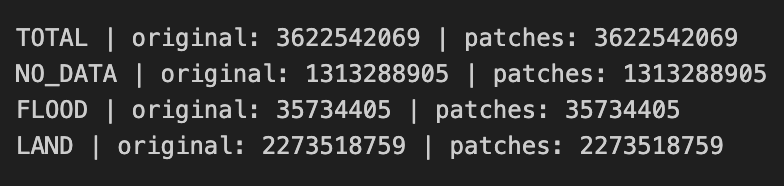

As there is no difference in pixel counts, it means the splitting up into patches worked perfectly!

## Results

**TODO**: 

An interesting observation I made was that all the UNets, regardless of the features they were trained on, were able to detect land much more accurately than flood. I believe this can be linked back to the VV and VH backscatter histograms where the land intensity pixels have a clearer, stronger intensity signature, while flood/water pixels are much less distinct. As a result, the models learned land features more easily and detect land much more accurately than floods.

**RQ 1: How can historical SAR-based flood extent data be used to identify recurring flood-prone regions?**
   
Historical SAR-flood based maps allow us to observe flood occurances across the Earth over time. This project has shown that a simple UNet model is able to identify regions with flooding with good accuracy (82%). By passing more vv and vh files of regions outside the U.S and Bangladesh, a model can be trained to identify these regions. Unfortunately I had not trained my model to do this due to a lack of time. However, after researching, I found that this is possible because the .tif files contain geolocation metadata. This means that once the model predicts flood pixels, these predictions can be mapped back to their geographic coordinates to identify the regions where flooding occurs most frequently.

Implications: Historical SAR data combined with ML models would allow the creation of flood frequency maps. This can be used for early planning, warning, evacuation, and overall save more lives.

**RQ 2: How accurately can Machine Learning models detect flood extents from Sentinel-1 SAR imagery compared to existing baseline methods?**

Some research studies which had used deep learning with satellite imagery like Sentinel-1 for flood detection had reported higher accuracy scores of around 90%. This may be due to them using more complex models which could have picked up on more complex features which the model I trained was not able to. Additionally, due to time capacity and limitations in computing power (ran on my laptop) I was only able to run 5 epochs, when in reality many studies had ran multiple more. When comparing SAR imagery to other existing flood detection techniques however, Water indices such as NDWI, MNDWI, AWEI, or simple SAR backscatter thresholds often achieve overall accuracies around 80–90% in test cases (reported in literature). These methods however, may be much faster to implement compared to predicting using ML models. Rainfall-Based flood predicition has been reported to have accuracies of between 70%-90% (reported in literature). Predictions using river gauge data which is often able to predict floods 1-3 days in advance has reported accuracies between 80%-95% (reported in literature). Some statistical approaches like frequency analysis have been reported to have accuracies of between 60%-85% (reported in literature). 
    
While my model had not outperformed all of these methods, this project was carried out under resource limitations which would have resulted in lower accuracy scores. The high accuracy scores from previous studies which utilize satellite imagery, shows that flood extent detection using Sentinel-1 SAR imagery is extremely promising, and combining existing methods like Rainfall-Based flood predicition with this data can possibly improve accuracy scores further.

Implications: This would allow a more accurate flood detection model which can help reduce the overall lives lost to flooding.
   
**RQ 3: What image-processing or feature-extraction techniques yield the most accurate flood extent detection from SAR data?**

My results indicate that the UNet using ratio as a feature had achieved the best accuracy with an accuracy score of just under 97%. However, it performed horribly in flood detection, detecting only 2.7% of floods. This is why its important to focus on not only the total accuracy but the accuracy in flood detection as well. The UNet which performed the best when considering both the total accuracy and the accuracy of flood detections was the UNet trained solely on vv. This is easier to visualize when looking at the diagrams at the bottom of this section.

The results, however, are quite interesting: the model performs better when trained solely trained on VV as opposed to both. However, when looking back to the histogram of VV and VH backscatter, I was able to identify that water pixels generally have a lower VV intensity than land pixels, however, I was unable to see the water label in the VH backscatter diagram. As I trained the model only on 5 epochs, it is possible that the model failed to pickup on hidden trends but was able to easily identify trends visible to the human eye which have been a reason behind this difference in performance.


**Model Training starts here**

I run the next pieces of code apart from the visualizations on VS code due to computing restrictions on jupyterlab along with memory restrictions not allowing me to upload my entire dataset. By changing the paths to the folders and downloading the dataset, the code should be able to run locally on VS code.

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import rasterio
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

PATCH_SIZE = 512
BATCH_SIZE = 4
EPOCHS = 5 #Set epoch to 1 initially to test if there are any errors or if everything works perfectly
FLOOD_WEIGHT = 5.0 

For RQ 3, I create 4 datasets, one only on vv files, one only on vh files, one using ratio, and one using both vh and vv. I designed the FloodDataset class with this in mind to handle the various scenarios.

In [ ]:
class FloodDataset(Dataset):
    """
    This class is used to load in my dataset. 
    """
    def __init__(self, file_triplets, patch_size=PATCH_SIZE, feature_type="all"):
        """
        Initializes the dataset class. The triplets (VH, VV, and label) are passed into
        the function alongside the patch_size and the feature type.
        """
        self.file_triplets = file_triplets
        self.patch_size = patch_size
        self.feature_type = feature_type

    def __len__(self):
        """
        Returns an integer of the length of the number of triplets
        """
        return len(self.file_triplets)

    def __getitem__(self, idx):
        """
        This function takes the idx of an image patch as input and returns a tuple of its
        the corresponding patch along with its label.
        """
        vv_path, vh_path, label_path = self.file_triplets[idx]

        vv = read_band(vv_path).astype(np.float32)
        vh = read_band(vh_path).astype(np.float32)
        label = read_band(label_path)

        vv = (vv - vv.min()) / (vv.max() - vv.min() + 1e-6)
        vh = (vh - vh.min()) / (vh.max() - vh.min() + 1e-6)

        H, W = vv.shape
        pad_h = max(0, self.patch_size - H)
        pad_w = max(0, self.patch_size - W)
        if pad_h > 0 or pad_w > 0:
            vv = np.pad(vv, ((0, pad_h), (0, pad_w)), constant_values=0)
            vh = np.pad(vh, ((0, pad_h), (0, pad_w)), constant_values=0)
            label = np.pad(label, ((0, pad_h), (0, pad_w)), constant_values=15)

        label[label == 255] = 1
        label[label == 0] = 0
        label[label == 15] = 15
        label[~((label == 0) | (label == 1) | (label == 15))] = 15

        if self.feature_type == "vv":
            img = np.expand_dims(vv, axis = 0)
        elif self.feature_type == "vh":
            img = np.expand_dims(vh, axis = 0)
        elif self.feature_type == "ratio":
            ratio = np.clip(vv / (vh + 1e-6), 0, 10)
            img = np.expand_dims(ratio, axis = 0)
        elif self.feature_type == "all":
            img = np.stack([vv, vh], axis = 0)

        img = torch.from_numpy(img).float()
        label = torch.from_numpy(label).long()

        return img, label


In [ ]:
class DoubleConv(nn.Module):
    """
    This class is used to initialize the DoubleConv layer. 
    An important layer in the UNet architecture.
    """
    def __init__(self, in_c, out_c):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding = 1),
            nn.ReLU(inplace = True),
            nn.Conv2d(out_c, out_c, 3, padding = 1),
            nn.ReLU(inplace = True),
        )

    def forward(self, x):
        return self.seq(x)

class UNetSmall(nn.Module):
    def __init__(self, in_ch = 2, n_classes = 2):
        super().__init__()
        self.down1 = DoubleConv(in_ch, 16)
        self.pool1 = nn.MaxPool2d(2)
        self.down2 = DoubleConv(16, 32)
        self.pool2 = nn.MaxPool2d(2)

        self.bottleneck = DoubleConv(32, 64)

        self.up2 = nn.ConvTranspose2d(64, 32, kernel_size = 2, stride = 2)
        self.dec2 = DoubleConv(64, 32)

        self.up1 = nn.ConvTranspose2d(32, 16, kernel_size = 2, stride = 2)
        self.dec1 = DoubleConv(32, 16)

        self.final = nn.Conv2d(16, n_classes, kernel_size = 1)

    def forward(self, x):
        c1 = self.down1(x)
        p1 = self.pool1(c1)
        c2 = self.down2(p1)
        p2 = self.pool2(c2)
        bn = self.bottleneck(p2)
        u2 = self.up2(bn)
        u2 = torch.cat([u2, c2], dim = 1)
        c3 = self.dec2(u2)
        u1 = self.up1(c3)
        u1 = torch.cat([u1, c1], dim = 1)
        c4 = self.dec1(u1)
        return self.final(c4)


In [ ]:
"""
This code collects the file paths for the triplets, pairs them together,
and finally splits into training and testing sets.
"""
patch_dir = "data_split"
file_triplets = []

for loc_name in os.listdir(patch_dir):
    loc_path = os.path.join(patch_dir, loc_name)
    if not os.path.isdir(loc_path):
        continue
    vv_dir = os.path.join(loc_path, "vv")
    vh_dir = os.path.join(loc_path, "vh")
    label_dir = os.path.join(loc_path, "label")

    vv_files = sorted(os.listdir(vv_dir))
    vh_files = sorted(os.listdir(vh_dir))
    label_files = sorted(os.listdir(label_dir))

    for vv_file, vh_file, label_file in zip(vv_files, vh_files, label_files):
        file_triplets.append((
            os.path.join(vv_dir, vv_file),
            os.path.join(vh_dir, vh_file),
            os.path.join(label_dir, label_file)
        ))

train_files, test_files = train_test_split(file_triplets, test_size = 0.2, random_state = 42)
print(f"Training samples: {len(train_files)}, Testing samples: {len(test_files)}")


In [ ]:
"""
This is where the model is trained for each feature type and records its performance.
"""

feature_types = ["vv", "vh", "ratio", "all"]
results = {}

for feat in feature_types:

    train_dataset = FloodDataset(train_files, feature_type = feat)
    test_dataset  = FloodDataset(test_files, feature_type = feat)

    train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
    test_loader  = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False)

    in_ch = 1 if feat in ["vv", "vh", "ratio"] else 2
    model = UNetSmall(in_ch = in_ch, n_classes = 2).to(device)
    optimizer = optim.Adam(model.parameters(), lr = 1e-4)

    weight = torch.tensor([1.0, FLOOD_WEIGHT]).to(device)
    criterion = nn.CrossEntropyLoss(ignore_index = 15, weight = weight)

    for epoch in range(EPOCHS):
        model.train()
        total_loss = 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            preds = model(imgs)
            loss = criterion(preds, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

    model.eval()
    overall_correct = flood_correct = land_correct = 0
    total_pixels = flood_total = land_total = 0

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            pred = torch.argmax(model(imgs), dim = 1)

            mask = labels != 15
            overall_correct += (pred[mask] == labels[mask]).sum().item()
            total_pixels += mask.sum().item()

            flood_mask = labels == 1
            land_mask = labels == 0
            flood_total += flood_mask.sum().item()
            land_total += land_mask.sum().item()
            flood_correct += (pred[flood_mask] == 1).sum().item()
            land_correct += (pred[land_mask] == 0).sum().item()

    results[feat] = {
        "overall": overall_correct / total_pixels,
        "flood": flood_correct / flood_total,
        "land": land_correct / land_total
    }

for feat, r in results.items():
    print(f"{feat}: overall={r['overall']:.4f}, flood={r['flood']:.4f}, land={r['land']:.4f}")


As I can't run it on jupyter lab, here is a picture of my output

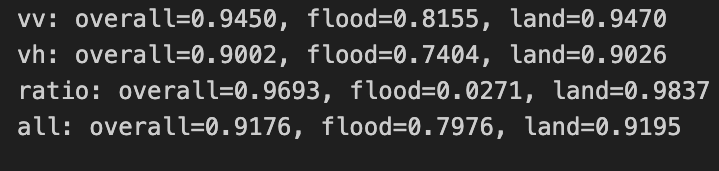

In [31]:
import io
csv = """
Feature,Overall,Flood,Land
vv,0.9450,0.8155,0.9470
vh,0.9002,0.7404,0.9026
ratio,0.9693,0.0271,0.9837
all,0.9176,0.7976,0.9195
"""

results = pd.read_csv(io.StringIO(csv))
results

,Feature,Overall,Flood,Land
0,vv,0.9450,0.8155,0.9470
1,vh,0.9002,0.7404,0.9026
2,ratio,0.9693,0.0271,0.9837
3,all,0.9176,0.7976,0.9195


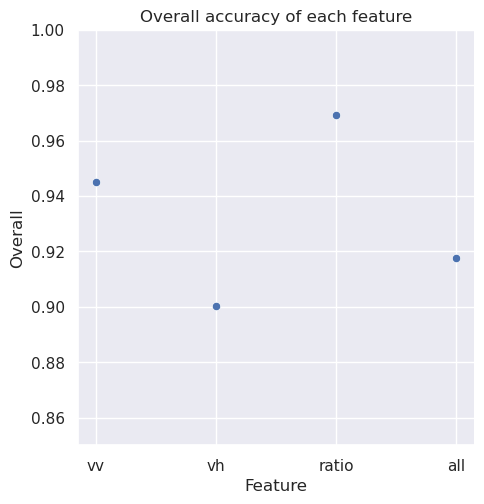

In [34]:
sns.relplot(
    data = results,
    x = "Feature", 
    y = "Overall",
    kind = "scatter",
)
plt.ylim(0.85, 1)
plt.title("Overall accuracy of each feature")
plt.show()


This plot shows the overall accuracy achieved by each feature type (VV, VH, Ratio, and All). Although the ratio model reports the highest overall accuracy, this number is misleading because it is heavily influenced by land pixels, which dominate the dataset. The VV model shows strong performance overall, while VH and all perform slightly lower.

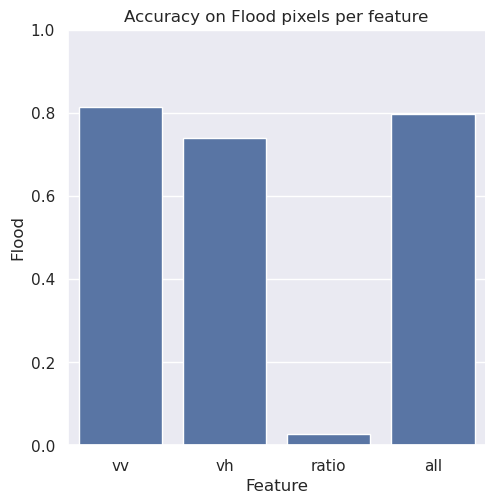

In [35]:
sns.catplot(
    data=results,
    x="Feature",
    y="Flood",
    kind="bar"
)
plt.ylim(0, 1)
plt.title("Accuracy on Flood pixels per feature")
plt.show()

This bar plot highlights how well each feature type detects flood pixels specifically. Here, the limitations of the ratio feature become clear, despite its high overall accuracy, it performs extremely poorly on flood detection. VV achieves the strongest flood accuracy, followed by all and VH. This reinforces that evaluating flood detection requires more than looking at overall accuracy alone.

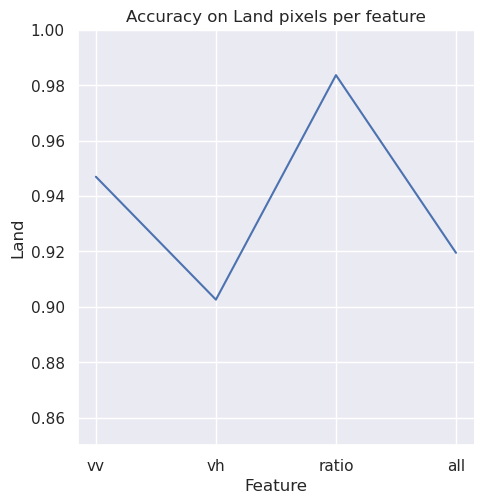

In [36]:
sns.relplot(
    data=results.reset_index(),
    x="Feature",
    y="Land",
    kind="line"
)
plt.ylim(0.85, 1)
plt.title("Accuracy on Land pixels per feature")
plt.show()


This line plot shows accuracy on land pixels. All feature types perform very well, with accuracies above 90% for most cases. ratio achieves the highest land accuracy, which explains its inflated overall accuracy. VV, VH, and all all remain consistently strong, showing that land features are much easier for the model to learn compared to flood features.

## Implications and Limitations

My project is particularly beneficial to those living in flood prone regions as this could help identify these regions from past SAR data with a good accuracy and overall help fortify these regions and save lives.
 
 However, the dataset I used only included floodings from the U.S and Bangladesh. As a result, the model may have failed to generalize to other regions which would result in lower accuracies when testing the model on regions outside the U.S and Bangladesh. 
 
 Additionally, due to restricted computing resources (running on my laptop), it took around 7-8 hours to run 5 epochs for all the features on my laptop. This was extremely time consuming and as a result I had limited the model to only 5 epochs and was unable to run more complex models, further hindering its accuracy by preventing it from learning additional underlying features.

 Another limitation I faced, was in building a model to predict floodings. This would have involved combining SAR imagery with other geographical factors, sea-levels, etc. I failed to explore this due to a lack of time and due to its complexity.

 Overall my project shows that SAR imagery is a strong feature to consider when looking to predict floods and with greater computational power and combining other features with SAR data, the model would be able to predict floodings. My project shows that identifying flood prone regions in the world using ML is also possible given more data and this would overall save more lives from floodings.

## Challenge Goals

**TODO**: 
1. Messy Data

This project will meet the Messy Data challenge goal as the primary dataset that I will be using consists of SAR images which are not in standard CSV, JSON, or text formats. Before model training, I had preprocessed these files by first splitting a larger .tif file into multiple smaller .tif files of size 512 * 512 pixels. I did this to try to standardize inputs into the ML model and to reduce training time. However, since the height and width of these files weren't perfectly divisble by 512, some of the patches were of smaller sizes. As a result I had to add padding to the patches to ensure they were of size 512 * 512 pixels. This was done by first converting the patches into numpy arrays. I also had to normalize the pixel values to be between the range 0 and 1 to ensure there were no large calculations taking place leading to an exploding gradient. Finally after this, I had converted the numpy arrays into tensors for model training and split into train and test sets.

2. Advanced Machine Learning

This project also meets the Advanced Machine Learning challenge goal as I implemented a UNet algorithm using PyTorch to carry out flood detection. UNet is not readily available in scikit-learn and I built the architecture from scratch. Additionally, the model carries out a binary classification task on each and every pixel, thereby outputting a 512 * 512 grid of predictions as opposed to a single label. I had also made use of weighted classes to handle the imbalance in the dataset and built a custom dataset class to handle out preprocessing.

3. New Library

During this project, I used Rasterio extensively as opposed to libraries like PIL for processing the .tif files. Rasterio is designed specifically for reading and manipulating geospatial raster formats. I used Rasterio to open and read the Sentinl-1 SAR .tif files without losing geospatial data, extract the pixel arrays from the VV, VH, and label rasters, and to split larger rasters by splitting them into smaller patches. I used Rasterio as libraries like PIL are not suitable for this task, often dropping geospatial metadata or altering pixel intensities.

## Plan Evaluation

**TODO**: My estimate for the Data Loading and Preprocessing was around 5-10 hours. It was a little off, it took me an additional 4 hours to learn how to split the raster into multiple smaller patches. Most of my time went into downloading the dataset since I needed to learn data scraping from scratch to automate the process. Additionally, I spent a lot of time trying to understand the data as it is not images but tif files.

My estimate for model training was greater than 10-15 hours. I think this was a fair estimate as I had not precisely defined how long I expected this to take. It took me around 12-13 hours to develop the model, custom dataset class, tweak the parameters of the model, fix erros, etc. Running the model on the other hand did take a bit of time, I did have to leave it to train overnight and it took between 7-8 hours.

My estimate for model evaluation and Visualization was between 5-7 hours, as I incorporated model evaluation within the training block, I do not have an exact estimate for this but it would have taken less than 5 hours considering training+testing took between 7-8 hours. Further visualizations took only about half an hour as there were only 3 visualizations I made with the results.

## Testing

**TODO**: I used doctests wherever I could, for example in datascraping I used it in the get_file_links function. However, in cases which I could not, I ran the function individually, passing single files or directories and visually checked if they worked. I included comments in these cells signifying which functions they were testing.